<a href="https://colab.research.google.com/github/DanielT118/Gallstones-Research-Project/blob/main/Gallstones_Written_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the Strongest Indicators of Gallstone Disease to Make Predictions

Daniel Trinquier

In [ ]:
#This code is simply importing the libraries needed for creating my figures later in the report
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

import numpy as np

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [ ]:
#Here I am loading the gallstone dataset into a dataframe from my github repository
url = "https://raw.githubusercontent.com/DanielT118/Gallstones-Research-Project/refs/heads/main/dataset-uci%5B1%5D.csv"
df = pd.read_csv(url)

Abstract:

This study focused on gallstone disease, a common digestive disorder, with the hopes of identifying risk factors of the disease and strengthening preventative care through machine learning. Using the SelectKBest feature of the sklearn library, the features most strongly correlated to gallstone status were identified. Of these features, a KNearestNeighbors machine learning algorithm was trained on three of them, Vitamin D, C-Reactive Protein and bone mass. The studies had a couple of major findings. Firstly, Vitamin D deficiency, high levels of C-Reactive Protein and low bone mass were all strong indicators of risk for gallstone disease. Furthermore, using a machine learning algorithm, predictions about gallstone disease could be made with relatively high accuracy. From these results, we can come to the conclusion that the aforementioned factors may be able to be used by those in the medical field to identify individuals at risk for gallstones early. Not only that, but the medical field as whole may be able to use data science and machine learning techniques to enhance their early predictions for certain diseases, as shown here with gallstones.


Background:

Gallstone disease is a digestive disorder in which deposits of hardened cholesterol, bilirubin or other substances are formed in the gallbladder. The disease, which affects millions of people worldwide, may lead to symptoms such as pain or nausea, and may often require surgical intervention. The dataset used for this study contains the anonymized medical records of over three hundred individuals, with just around half suffering from gallstone disease. For each individual, nearly 40 different variables were recorded. By analyzing the dataset, trends and risk factors for gallstones can be identified with the hope of strengthening preventive measures and personal care for those affected by the disease. For this study, the primary research question was as follows - what features are most predictive of gallstone disease, and how accurately can we use a machine learning model to make predictions about at-risk individuals based on these features? Given that the study was primarily exploratory, the study did not begin with a formal hypothesis.


Figure 1: Significance of Features Based on ANOVA F-Value

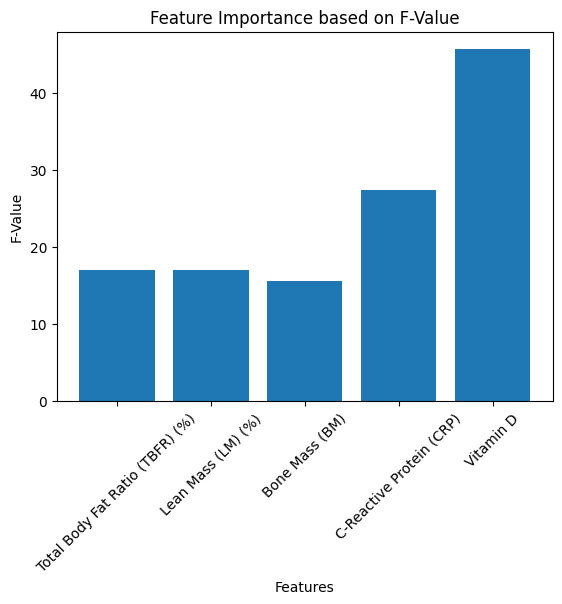

In [ ]:
#This code is using SelectKBest from the sklearn library to determine the features most related to the target and output them in the form of a bar plot with their respective f-values
features = df.drop('Gallstone Status', axis = 1)
label = df['Gallstone Status']

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k = 5)
selector.fit_transform(features, label)


best_features = df[selector.get_feature_names_out()]

fit = selector.fit(best_features, label)
scores = fit.scores_
feature_names = best_features.columns

plt.bar(feature_names , scores)
plt.xlabel("Features")
plt.ylabel("F-Value")
plt.title("Feature Importance based on F-Value")
plt.xticks(rotation= 45)
plt.show()

Fig 1: This bar plot was constructed using sklearn’s built in SelectKBest feature. The plot displays the features with the highest f-values, or in other words, the features with a relationship most statistically significantly correlated to the target variable, gallstone status. For the sake of building the most accurate machine learning model, I used the two runaway best features, Vitamin D and C-Reactive Protein. For the third feature, Bone Mass, which ranked a close fifth overall, gave the best results.


Figure 2: Vitamin D Level Based Grouped by Gallstone Status

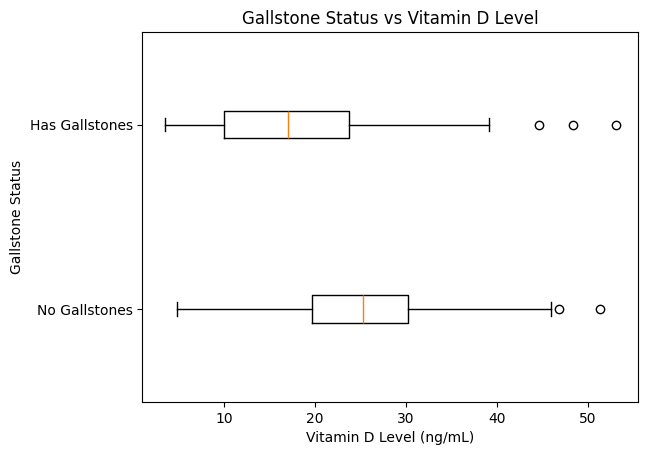

In [ ]:
#This code creates comparative boxplots for Vitamin D levels between those with and without gallstones in the dataset
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
vitamin_d_graph = no_gallstones['Vitamin D'], gallstones_present['Vitamin D']
plt.boxplot(vitamin_d_graph, vert = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('Vitamin D Level (ng/mL)')
plt.ylabel('Gallstone Status')
plt.title('Gallstone Status vs Vitamin D Level')
plt.show()

Fig 2: This figure shows comparative boxplots of the Vitamin D levels of both the gallstone and no gallstone groups in the dataset. The major conclusion here is that a Vitamin D deficiency can be used to indicate a higher risk of gallstone disease.


Figure 3: C-Reactive Protein Level Grouped by Gallstone Status

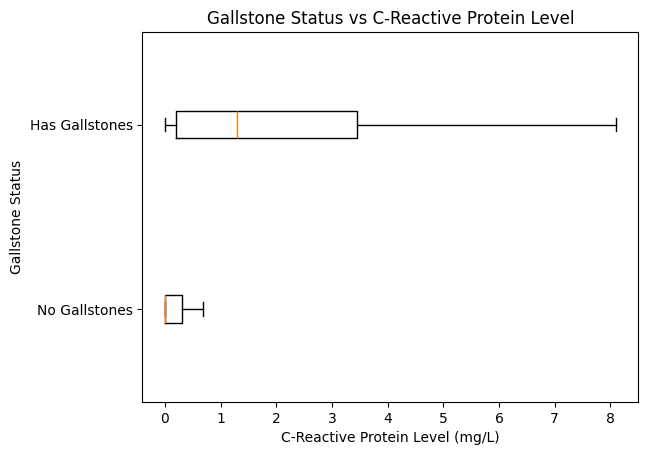

In [ ]:
#This code creates comparative boxplots for C-Reactive Protein levels between those with and without gallstones in the dataset
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
crp_graph = no_gallstones['C-Reactive Protein (CRP)'], gallstones_present['C-Reactive Protein (CRP)']
plt.boxplot(crp_graph, vert = False, showfliers = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('C-Reactive Protein Level (mg/L)')
plt.ylabel('Gallstone Status')
plt.title('Gallstone Status vs C-Reactive Protein Level')
plt.show()

Fig 3: This figure shows comparative boxplots of the C-Reactive Protein levels of both the gallstone and no gallstone groups in the dataset. Given C-Reactive Protein is an inflammation marker, it makes sense that the figure indicates that high CRP levels are associated with gallstone disease. As both groups had some pretty extreme outliers, they have been removed for simplicity and the aesthetics of the graph.


Figure 4: Proportion of Patients with Gallstones Based on Bone Mass

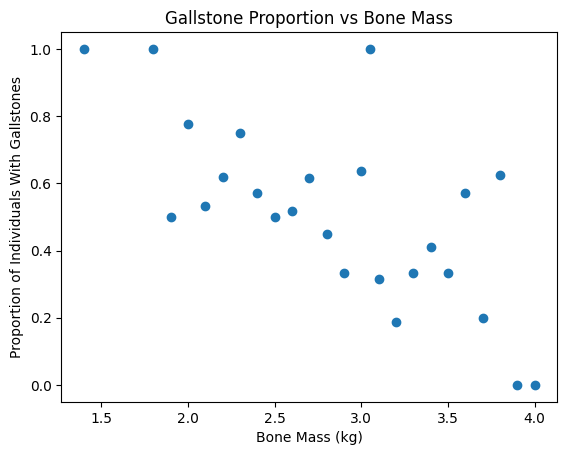

In [ ]:
#This code compares each unique bone mass in the dataset to the proportion of patients who had gallstones at said bone mass in the datset
grouped_data = df.groupby('Bone Mass (BM)')
gallstone_frac = grouped_data['Gallstone Status'].mean()

x_values = gallstone_frac.index
plt.scatter(x_values, gallstone_frac)

plt.xlabel('Bone Mass (kg)')
plt.ylabel('Proportion of Individuals With Gallstones')
plt.title('Gallstone Proportion vs Bone Mass')

plt.show()

Fig 4: This figure shows a scatter plot that compares each unique bone mass represented in the dataset to the proportion of patients who had gallstones at said bone mass. The conclusion we can take from this figure is that a low bone mass can be indicative of gallstone disease.


Figure 5: Comparing Vitamin D to Bone Mass

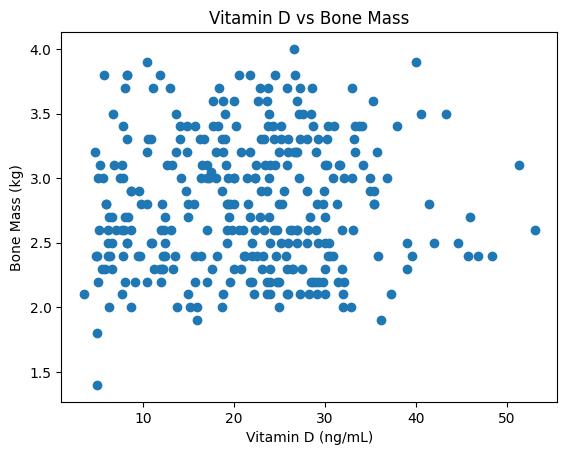

In [ ]:
#This code compares Vitamin D and Bone mass in the datset through the use of a scatter plot
plt.scatter(df['Vitamin D'], df['Bone Mass (BM)'])

plt.xlabel('Vitamin D (ng/mL)')
plt.ylabel('Bone Mass (kg)')
plt.title('Vitamin D vs Bone Mass')

plt.show()

Fig 5: Given that Vitamin D is crucial to bone health, I wanted to ensure that the two features were not two strongly correlated, or in other words, were providing the same information to the machine learning algorithm. Given an analysis of the correlation and the random dispersion in the figure comparing the two, it is safe to assume that both features may be used in my model without conveying the same thing.


Figure 6: Confusion Matrix for the KNearestNeighbors Machine Learning Model

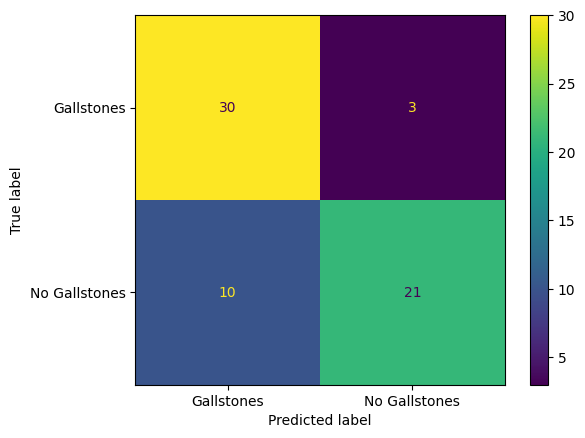

In [ ]:
#This codes creates and initalizes a KNearestNeighbors machine learning model and outputs a classification report and confusion matrix to evaluate its performance
features = df[['C-Reactive Protein (CRP)', 'Vitamin D', 'Bone Mass (BM)']]
labels = df['Gallstone Status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state = 42)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ['Gallstones', 'No Gallstones'])

plt.show()

Fig 6: This figure demonstrates the confusion algorithm for the KNN learning algorithm that I trained. It represents a model with decent success, as the number of true positives and negatives it identified pretty significantly outweighed the number of mistakes it made.


Figure 7: Classification Report for the KNearestNeighbors Machine Learning Model

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.88      0.68      0.76        31

    accuracy                           0.80        64
   macro avg       0.81      0.79      0.79        64
weighted avg       0.81      0.80      0.79        64



Fig 7: This shows us the classification report for the machine learning algorithm. As shown across a number of different metrics, it could predict gallstone status to a quite passable although not outstanding degree.


Discussion:

From this data we can draw the conclusion that several lesser considered factors such as Vitamin D deficiency, high levels of C-Reactive Protein or low bone mass can be considered decently strong indicators of risk for the development of gallstone disease. Furthermore, the machine learning model was able to predict gallstone disease to a very passable extent. In the field of medicine in general, the results of this study demonstrate that data science techniques and machine learning can be used to strengthen preventative care, identify at-risk individuals or find connections that had been previously overlooked. While features that I had initially thought would be more significant such as BMI or obesity did not end up playing a major role in my study, that does not mean that they have no relationship to gallstones. Furthermore, while an eighty percent accuracy is a decently good performance, it could be interesting to see how using a different machine learning model as opposed to KNearestNeighbors or training the model on a different dataset may enhance its ability to make predictions.


Code and Data Availability:

The code can be found here, on my github repository: https://github.com/DanielT118/Gallstones-Research-Project/blob/main/Gallstones_Research_Project.ipynb

The dataset can be found here, on the UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/1150/gallstone-1


Acknowledgments:

I would like to acknowledge mentor Anna Calderon and TA Manasa Kolavennu for the feedback and guidance they provided me throughout my work on the project.

I would like to acknowledge The Coding School for teaching me the skills and presenting me with the opportunity necessary to create this project.